In [1]:
#import dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
import datetime
from scipy.stats import linregress
import seaborn as sns


#known issues
## zipcode "Texas" to 75042
## 7038 zip needs to be 75038

In [2]:
#file path
file = "combinedmlsdata.csv"

#read the file into pandas
df = pd.read_csv(file, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170566 entries, 0 to 170565
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   MLS #                            170566 non-null  object
 1   Unnamed: 1                       170566 non-null  object
 2   Address                          170566 non-null  object
 3   City                             170566 non-null  object
 4   List Price                       170566 non-null  object
 5   Original List Price              170549 non-null  object
 6   SqFt Total                       170557 non-null  object
 7   Close Price                      133254 non-null  object
 8   RATIO Current Price By SQFT      170507 non-null  object
 9   Number Of Stories                170565 non-null  object
 10  Beds Total                       170566 non-null  object
 11  Baths Total                      170566 non-null  object
 12  Parking Spaces G

In [3]:
df.columns.values.tolist()

['MLS #',
 'Unnamed: 1',
 'Address',
 'City',
 'List Price',
 'Original List Price',
 'SqFt Total',
 'Close Price',
 'RATIO Current Price By SQFT',
 'Number Of Stories',
 'Beds Total',
 'Baths Total',
 'Parking Spaces Garage',
 'Lot Size Area',
 'Yr Built',
 'Pool',
 'DOM',
 'Listing Date',
 'Close Date',
 'Expiration Date',
 'Cancelled Date',
 'Status Change Timestamp',
 'List Agent Full Name',
 'Buyers/SubAgent Full Name',
 'HOA',
 'MLS SubArea',
 'Property Sub Type',
 'Property Type',
 'RATIO Close Price By List Price',
 'School District',
 'Subdivision Name',
 'Zip Code']

In [4]:
#rename the unnamed column to Status for transaction status
mls_df = df.rename(columns={"Unnamed: 1": "Status"})
mls_df.dtypes

MLS #                              object
Status                             object
Address                            object
City                               object
List Price                         object
Original List Price                object
SqFt Total                         object
Close Price                        object
RATIO Current Price By SQFT        object
Number Of Stories                  object
Beds Total                         object
Baths Total                        object
Parking Spaces Garage              object
Lot Size Area                      object
Yr Built                           object
Pool                               object
DOM                                object
Listing Date                       object
Close Date                         object
Expiration Date                    object
Cancelled Date                     object
Status Change Timestamp            object
List Agent Full Name               object
Buyers/SubAgent Full Name         

In [5]:
mlsconvert_df = mls_df.convert_dtypes()

mlsconvert_df.dtypes

MLS #                              string
Status                             string
Address                            string
City                               string
List Price                         string
Original List Price                string
SqFt Total                         string
Close Price                        string
RATIO Current Price By SQFT        string
Number Of Stories                  string
Beds Total                         string
Baths Total                        string
Parking Spaces Garage              string
Lot Size Area                      string
Yr Built                           string
Pool                               string
DOM                                string
Listing Date                       string
Close Date                         string
Expiration Date                    string
Cancelled Date                     string
Status Change Timestamp            string
List Agent Full Name               string
Buyers/SubAgent Full Name         

In [6]:
# Replace remaining NaN fields across the data set with UnKnown
mls = mlsconvert_df.replace(to_replace = np.nan, value = '')

In [7]:
mls.dtypes

MLS #                              string
Status                             string
Address                            string
City                               string
List Price                         string
Original List Price                string
SqFt Total                         string
Close Price                        string
RATIO Current Price By SQFT        string
Number Of Stories                  string
Beds Total                         string
Baths Total                        string
Parking Spaces Garage              string
Lot Size Area                      string
Yr Built                           string
Pool                               string
DOM                                string
Listing Date                       string
Close Date                         string
Expiration Date                    string
Cancelled Date                     string
Status Change Timestamp            string
List Agent Full Name               string
Buyers/SubAgent Full Name         

In [8]:
mls.isnull().sum()


MLS #                              0
Status                             0
Address                            0
City                               0
List Price                         0
Original List Price                0
SqFt Total                         0
Close Price                        0
RATIO Current Price By SQFT        0
Number Of Stories                  0
Beds Total                         0
Baths Total                        0
Parking Spaces Garage              0
Lot Size Area                      0
Yr Built                           0
Pool                               0
DOM                                0
Listing Date                       0
Close Date                         0
Expiration Date                    0
Cancelled Date                     0
Status Change Timestamp            0
List Agent Full Name               0
Buyers/SubAgent Full Name          0
HOA                                0
MLS SubArea                        0
Property Sub Type                  0
P

In [9]:
#clean up the data types

#convert all number data types to float or integer
mls_df[["MLS #"]] = mls_df[["MLS #"]].apply(pd.to_numeric)
mls_df[["List Price"]] = mls_df[["List Price"]].astype(float)
mls_df[["Original List Price"]] = mls_df[["Original List Price"]].astype(float)

mls_df[["SqFt Total", "Close Price", "Number Of Stories", "RATIO Current Price By SQFT", 
        "Beds Total", "Baths Total", "Parking Spaces Garage", "Lot Size Area", "DOM", 
        "RATIO Close Price By List Price", "Zip Code"]] \
= mls_df[["SqFt Total", "Close Price", "Number Of Stories", "RATIO Current Price By SQFT", 
          "Beds Total", "Baths Total", "Parking Spaces Garage", "Lot Size Area", "DOM", 
          "RATIO Close Price By List Price", "Zip Code"]].apply(pd.to_numeric)

mls_df[["Yr Built"]] = mls_df[["Yr Built"]].astype(float)

#convert all dates to date
mls_df[["Listing Date"]] = pd.to_datetime(mls_df["Listing Date"], format='%m/%d/%y')
mls_df[["Close Date"]] = pd.to_datetime(mls_df["Close Date"], format='%m/%d/%y')
mls_df[["Expiration Date"]] = pd.to_datetime(mls_df["Expiration Date"], format='%m/%d/%y')
mls_df[["Cancelled Date"]] = pd.to_datetime(mls_df["Cancelled Date"], format='%m/%d/%y')
mls_df[["Status Change Timestamp"]] = pd.to_datetime(mls_df["Status Change Timestamp"], format='%m/%d/%y')

#convert all strings from objects to string

mls_df[['Status', 'Address', 'City', 'List Agent Full Name', 'Buyers/SubAgent Full Name', 
        'MLS SubArea', 'Property Sub Type', 'Property Type', 'School District', 'Subdivision Name', 'HOA', 'Pool']] \
= mls_df[['Status', 'Address', 'City', 'List Agent Full Name', 'Buyers/SubAgent Full Name', 
        'MLS SubArea', 'Property Sub Type', 'Property Type', 'School District', 'Subdivision Name', 'HOA', 'Pool']].convert_dtypes()
    
mls_df['Status'] = mls_df['Status'].convert_dtypes()

mls_df.dtypes

MLS #                                       int64
Status                                     string
Address                                    string
City                                       string
List Price                                float64
Original List Price                       float64
SqFt Total                                float64
Close Price                               float64
RATIO Current Price By SQFT               float64
Number Of Stories                         float64
Beds Total                                  int64
Baths Total                               float64
Parking Spaces Garage                     float64
Lot Size Area                             float64
Yr Built                                  float64
Pool                                       string
DOM                                         int64
Listing Date                       datetime64[ns]
Close Date                         datetime64[ns]
Expiration Date                    datetime64[ns]


In [10]:
mls_df.describe()

,MLS #,List Price,Original List Price,SqFt Total,Close Price,RATIO Current Price By SQFT,Number Of Stories,Beds Total,Baths Total,Parking Spaces Garage,Lot Size Area,Yr Built,DOM,RATIO Close Price By List Price,Zip Code
count,1.705660e+05,1.705660e+05,1.705490e+05,170557.000000,1.332540e+05,170507.000000,170565.000000,170566.000000,170566.00000,170469.000000,169790.000000,170561.000000,170566.000000,133254.000000,170566.000000
mean,1.390094e+07,4.174742e+05,4.324985e+05,2180.710484,3.544179e+05,167.849893,1.445349,3.226194,2.27437,1.591891,3.088491,1981.131466,49.459576,0.985307,75155.908464
std,3.570198e+05,7.765706e+05,1.246974e+06,1561.442562,4.328195e+05,111.566325,0.617541,0.930758,0.90486,0.920248,161.572103,68.738415,67.759028,0.085270,183.672527
min,9.108100e+06,0.000000e+00,0.000000e+00,0.000000,1.000000e+01,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1800.000000,-477.000000,0.000070,7038.000000
25%,1.360218e+07,1.799000e+05,1.805000e+05,1416.000000,1.730000e+05,108.620000,1.000000,3.000000,2.00000,1.000000,0.160000,1962.000000,6.000000,0.964910,75080.000000
50%,1.390759e+07,2.650000e+05,2.699000e+05,1882.000000,2.450000e+05,141.430000,1.000000,3.000000,2.00000,2.000000,0.193000,1981.000000,24.000000,0.990550,75204.000000
75%,1.419954e+07,4.350000e+05,4.490000e+05,2582.000000,3.890000e+05,202.290000,2.000000,4.000000,3.00000,2.000000,0.270000,2001.000000,68.000000,1.000530,75225.000000
max,1.455680e+07,1.899000e+08,3.418200e+08,398618.000000,3.920000e+07,22317.550000,9.000000,10.000000,17.50000,15.000000,29325.000000,9999.000000,3437.000000,10.350520,76752.000000


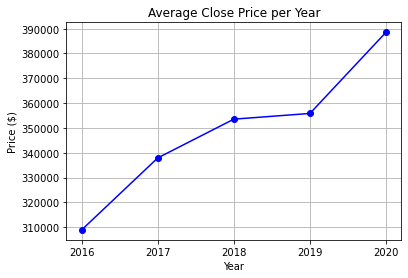

In [19]:
#filtering dates by year
twentysixteen = mls_df[(mls_df['Close Date']>= '2016-1-1') & (mls_df['Close Date'] <= '2016-12-31')]
twentyseventeen = mls_df[(mls_df['Close Date']>= '2017-1-1') & (mls_df['Close Date'] <= '2017-12-31')]
twentyeighteen = mls_df[(mls_df['Close Date']>= '2018-1-1') & (mls_df['Close Date'] <= '2018-12-31')]
twentynineteen = mls_df[(mls_df['Close Date']>= '2019-1-1') & (mls_df['Close Date'] <= '2019-12-31')]
twentytwenty = mls_df[(mls_df['Close Date']>= '2020-1-1') & (mls_df['Close Date'] <= '2020-12-31')]
#calculating the average close price per year
sixteen_price = round(twentysixteen['Close Price'].mean(),2)
seventeen_price = round(twentyseventeen['Close Price'].mean(),2)
eighteen_price = round(twentyeighteen['Close Price'].mean(),2)
nineteen_price = round(twentynineteen['Close Price'].mean(),2)
twenty_price = round(twentytwenty['Close Price'].mean(),2)
#create a list for our x-axis
x_axis = [2016, 2017, 2018, 2019, 2020]
#create a list for our y-axis
average_price_axis = [sixteen_price, seventeen_price, eighteen_price, nineteen_price, twenty_price]

plot_df = pd.DataFrame({'Year' : x_axis, 'Average Close Price' : average_price_axis})
#plot our data
plt.plot(x_axis, average_price_axis, marker="o", color="blue", label="Average Close Price")
#create title and labels
plt.title("Average Close Price per Year")
plt.xlabel("Year")
plt.ylabel("Price ($)")
#clean up the tickmarks
ticks = (range(2016,2021,1))
labels = x_axis
#plot ticks and grid
plt.xticks(ticks, labels)
plt.grid()

plt.savefig('AverageClosePriceperYear')

plt.show()

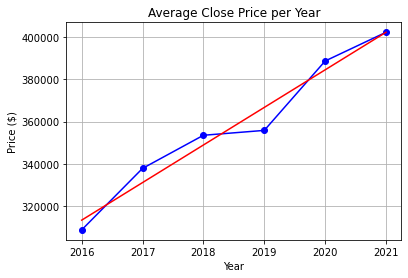

Using .polyfit we can predict the Average Close Price for 2021 to be $402132.25


In [20]:
#Use np.polyfit to enter our x and y axis data into a polynomial equation with a degree of 1
model = np.polyfit(x_axis,average_price_axis,1)
#np.poly.1d to predict future data
predict = np.poly1d(model)
#future date
year = 2021
#future average price
future_average_price = round(predict(year),2)
#state the range of dates you want in your regression
x_lin_reg = range(2016,2022)
#predict based on the date range
y_lin_reg = predict(x_lin_reg)
#append our x-axis list with the future date
x_axis.append(year)
#append our y-data list with the future average
average_price_axis.append(future_average_price)
#plot our data
plt.plot(x_axis, average_price_axis, marker="o", color="blue", label="Average Close Price")
#plot title and labels
plt.title("Average Close Price per Year")
plt.xlabel("Year")
plt.ylabel("Price ($)")
#plot our regression
plt.plot(x_lin_reg, y_lin_reg, color = 'red')
#plot grid
plt.grid()

plt.savefig('AverageClosePriceperYearPrediction.png')

plt.show()

print(f'Using .polyfit we can predict the Average Close Price for 2021 to be ${future_average_price}')